In [1]:
import pandas as pd

## 1) Preprocessing Images Before Importing

In [27]:
import pandas as pd

data= pd.read_csv('/Users/yillysaurus/PycharmProjects/challenge-mole/clin_dia.csv')

data.head()

,klin. Diagn.,id,nr,Histo performed,Diagnose red.,kat.Diagnose
0,Compound Nävus,d1,1,0,Compound Nevus,1
1,Compound Nävus,d2,2,0,Compound Nevus,1
2,Dysplastischer Nävus,d3,3,0,Compound Nevus,1
3,Compound Nävus,d4,4,0,Compound Nevus,1
4,Dermaler Nävus,d5,5,0,Compound Nevus,1


In [3]:
data.head()

,klin. Diagn.,id,nr,Histo performed,Diagnose red.,kat.Diagnose
0,Compound Nävus,d1,1,0,Compound Nevus,1
1,Compound Nävus,d2,2,0,Compound Nevus,1
2,Dysplastischer Nävus,d3,3,0,Compound Nevus,1
3,Compound Nävus,d4,4,0,Compound Nevus,1
4,Dermaler Nävus,d5,5,0,Compound Nevus,1


In [4]:
data.drop(['klin. Diagn.', "nr", 'Histo performed', 'Diagnose red.'], axis=1, inplace=True)

In [5]:
data.head()

,id,kat.Diagnose
0,d1,1
1,d2,1
2,d3,1
3,d4,1
4,d5,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            3000 non-null   object
 1   kat.Diagnose  3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


In [7]:
data['kat.Diagnose'].replace('1', '0', inplace=True)

In [8]:
data['kat.Diagnose'].replace('2', '1', inplace=True)
data['kat.Diagnose'].replace('3', '1', inplace=True)
data['kat.Diagnose'].replace('?', '1', inplace=True)

In [9]:
data['kat.Diagnose'].value_counts()

0    2362
1     638
Name: kat.Diagnose, dtype: int64

In [10]:
data.id = data.id.str.upper()

In [11]:
data['id'] = data['id'] + '.BMP'

In [12]:
data.head()

,id,kat.Diagnose
0,D1.BMP,0
1,D2.BMP,0
2,D3.BMP,0
3,D4.BMP,0
4,D5.BMP,0


In [13]:
benign_list = data[data['kat.Diagnose'] == "0"].id.values
malignant_list = data[data['kat.Diagnose'] == "1"].id.values

In [14]:
import os
import glob
import shutil

In [15]:
os.chdir('/Users/yillysaurus/PycharmProjects/challenge-mole/assets/SET_D')
for file in glob.glob('*.BMP'):
    if file in benign_list:
        shutil.move(file, '/Users/yillysaurus/PycharmProjects/challenge-mole/assets/Training/Benign')
    else:
        shutil.move(file, '/Users/yillysaurus/PycharmProjects/challenge-mole/assets/Training/Malignant')
os.chdir('../../')

In [16]:
os.chdir('/Users/yillysaurus/PycharmProjects/challenge-mole/assets/SET_E')
for file in glob.glob('*.BMP'):
    if file in benign_list:
        shutil.move(file, '/Users/yillysaurus/PycharmProjects/challenge-mole/assets/Training/Benign')
    else:
        shutil.move(file, '/Users/yillysaurus/PycharmProjects/challenge-mole/assets/Training/Malignant')
os.chdir('../../')

In [17]:
os.chdir('/Users/yillysaurus/PycharmProjects/challenge-mole/assets/SET_F')
for file in glob.glob('*.BMP'):
    if file in benign_list:
        shutil.move(file, '/Users/yillysaurus/PycharmProjects/challenge-mole/assets/Training/Benign')
    else:
        shutil.move(file, '/Users/yillysaurus/PycharmProjects/challenge-mole/assets/Training/Malignant')
os.chdir('../../')

In [18]:
os.getcwd()

'/Users/yillysaurus/PycharmProjects/challenge-mole'

## 2) Importing Images

In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_batches = train_datagen.flow_from_directory(
    '/Users/yillysaurus/PycharmProjects/challenge-mole/assets/Training',
    seed=123,
    target_size=(224,224),
    batch_size=32,
    classes=['Benign', 'Malignant'],
    class_mode='binary')




test_batches = test_datagen.flow_from_directory(
    '/Users/yillysaurus/PycharmProjects/challenge-mole/assets/Testing',
    seed=123,
    target_size=(224,224),
    batch_size=32,
    classes=['Benign', 'Malignant'],
    class_mode='binary')

Found 2321 images belonging to 2 classes.


In [8]:

model.summary()

{'Benign': 0, 'Malignant': 1}

## 3) Creating Model

In [4]:
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

# this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

/Users/yillysaurus/PycharmProjects/kaggle-project/venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50


ValueError: in user code:

    /Users/yillysaurus/PycharmProjects/kaggle-project/venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /Users/yillysaurus/PycharmProjects/kaggle-project/venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/yillysaurus/PycharmProjects/kaggle-project/venv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/yillysaurus/PycharmProjects/kaggle-project/venv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/yillysaurus/PycharmProjects/kaggle-project/venv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/yillysaurus/PycharmProjects/kaggle-project/venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /Users/yillysaurus/PycharmProjects/kaggle-project/venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:755 train_step
        loss = self.compiled_loss(
    /Users/yillysaurus/PycharmProjects/kaggle-project/venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Users/yillysaurus/PycharmProjects/kaggle-project/venv/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    /Users/yillysaurus/PycharmProjects/kaggle-project/venv/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /Users/yillysaurus/PycharmProjects/kaggle-project/venv/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Users/yillysaurus/PycharmProjects/kaggle-project/venv/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:1608 binary_crossentropy
        K.binary_crossentropy(y_true, y_pred, from_logits=from_logits), axis=-1)
    /Users/yillysaurus/PycharmProjects/kaggle-project/venv/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Users/yillysaurus/PycharmProjects/kaggle-project/venv/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4979 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    /Users/yillysaurus/PycharmProjects/kaggle-project/venv/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Users/yillysaurus/PycharmProjects/kaggle-project/venv/lib/python3.8/site-packages/tensorflow/python/ops/nn_impl.py:173 sigmoid_cross_entropy_with_logits
        raise ValueError("logits and labels must have the same shape (%s vs %s)" %

    ValueError: logits and labels must have the same shape ((None, 111, 111, 1) vs (None, 1))


In [ ]:
model_trained=model.fit_generator(
        train_batches,
        steps_per_epoch=2000 // 32,
        epochs=50,
        validation_data=test_batches,
        validation_steps=500 // 32)

In [18]:
score = model.evaluate(test_batches, verbose=0)
print("Accuracy: %.2f%%" % (score[1]*100))

Accuracy: 76.51%


In [15]:
model.save("cancer_model.h5")

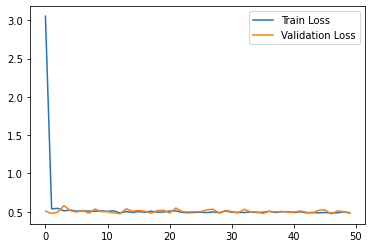

In [22]:
import matplotlib.pyplot as plt
plt.plot(model_trained.history['loss'], label='Train Loss')
plt.plot(model_trained.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

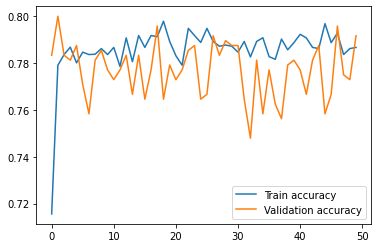

In [24]:
plt.plot(model_trained.history['accuracy'], label='Train accuracy')
plt.plot(model_trained.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [1]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)


NameError: name 'model' is not defined